# Rappi Pay - Challenge
## Víctor M.

---

In order to start the challenge, it is necessary to import all the libraries that we are going to use.

In [1]:
# Análisis exploratorio
#---------------------------------------------------------
import pandas as pd # Data management
import seaborn as sns #Visualization
import matplotlib.pyplot as plt #Visualization
import matplotlib.image as mpimg # Image Visualization
from IPython.display import Image #Image Visualization
import numpy as np  # Matematical operations
from datetime import datetime # Date management
import ast # Transform text in instructions

# Preprocesamiento
#---------------------------------------------------------
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from datetime import timedelta

# Split de los datos
#---------------------------------------------------------
from sklearn.model_selection import train_test_split


# Modelos
#---------------------------------------------------------

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans 

# Data augmentation
#---------------------------------------------------------
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE

# Evaluación
#---------------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import scikitplot as skplt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score

# Save
#---------------------------------------------------------
import pickle
from joblib import dump, load




## Exploratory analysis
-----

### Loading the information

The first thing we will do is read our information in csv format.

In [2]:
# Importing data
data = pd.read_csv('data/ds_challenge_2021.csv')

By printing the **first 5 rows**, we can see that our **dataset was loaded correctly**.

In [3]:
data.head()

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,F,608.345634,2020-01-21,20,"{'model': 2020, 'device_score': 3, 'os': 'ANDR...",Super,Merida,Física,71000,51,Aceptada,False,60.834563,5.475111,False
1,0,F,88.719243,2020-01-15,7,"{'model': 2020, 'device_score': 1, 'os': 'ANDR...",NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False
2,1,F,790.037653,2020-01-17,11,"{'model': 2020, 'device_score': 1, 'os': '.'}",NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False
3,1,F,767.005387,2020-01-05,11,"{'model': 2020, 'device_score': 3, 'os': 'WEB'}",MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,7.670054,False
4,1,F,254.171053,2020-01-30,10,"{'model': 2020, 'device_score': 3, 'os': '%%'}",NaN,Guadalajara,Física,94000,56,Aceptada,False,0.000000,2.541711,False


I can see that we have **16 variables** with **26975 rows**.

In [4]:
print('Number of variables = ' + str(data.shape[1]), '\nNumber of rows = '+ str(data.shape[0]))

Number of variables = 16 
Number of rows = 26975


We can see that in the `device` column, we have more information in dictionary format, that is why it is necessary to extract that information. <br>
The following code demonstrates the information extraction process.

In [5]:
modelos = []
device_score = []
os = []

for index, dict_text in enumerate(data['dispositivo']):
    
    try:
        dicc = ast.literal_eval(dict_text)
        
        assert len(dicc) == 3, "There is more than 3 keys"
        
        modelos.append(dicc['model'])
        device_score.append(dicc['device_score'])
        os.append(dicc['os'])
        
    except Exception as e:
        print (e)

data.loc[:, 'modelo'] = modelos
data.loc[:, 'device_score'] = device_score
data.loc[:, 'os'] = os  
data.drop(['dispositivo'], inplace = True, axis = 1)

In [6]:
data.head()

,ID_USER,genero,monto,fecha,hora,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,modelo,device_score,os
0,0,F,608.345634,2020-01-21,20,Super,Merida,Física,71000,51,Aceptada,False,60.834563,5.475111,False,2020,3,ANDROID
1,0,F,88.719243,2020-01-15,7,NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False,2020,1,ANDROID
2,1,F,790.037653,2020-01-17,11,NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False,2020,1,.
3,1,F,767.005387,2020-01-05,11,MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,7.670054,False,2020,3,WEB
4,1,F,254.171053,2020-01-30,10,NaN,Guadalajara,Física,94000,56,Aceptada,False,0.000000,2.541711,False,2020,3,%%


In [7]:
print('Now we have:\n''\tNumber of variables = ' + str(data.shape[1]), '\n\tNumber of rows = '+ str(data.shape[0]))

Now we have:
	Number of variables = 18 
	Number of rows = 26975


### Confirming the types

In order to ensure correct handling of the information, it is necessary to ensure that the data type was loaded successfully.

We can see: <br> 
- `fecha` was imported as text type
- `modelo` was imported as numeric 
- `fraude` was imported as boolean

In [8]:
data.dtypes

ID_USER              int64
genero              object
monto              float64
fecha               object
hora                 int64
establecimiento     object
ciudad              object
tipo_tc             object
linea_tc             int64
interes_tc           int64
status_txn          object
is_prime              bool
dcto               float64
cashback           float64
fraude                bool
modelo               int64
device_score         int64
os                  object
dtype: object

In [9]:
data.loc[:,'modelo'] = data['modelo'].astype(str)
data.loc[:, 'fraude'] = data['fraude'].map(lambda x: 1 if x  else 0)
data.loc[:, 'is_prime'] = data['is_prime'].map(lambda x: 1 if x  else 0)

If we analyze the variable `date`, we can realize that our range of transactions is the following:

In [10]:
data['fecha'] = pd.to_datetime(data['fecha'])
fechas = data['fecha'].copy()
print('Range:\t ({}, {})'.format(data['fecha'].min().date(), data['fecha'].max().date()))

Range:	 (2020-01-02, 2020-01-30)


We can see that our range is very small, only varying on the day of the month of January. <br>
For that reason, we will create a new variable called `day`, which will contain the day of the week of the transaction **0**: **Sunday**, **1**: **Monday**..., **6**: **Saturday**.

In [11]:
data.loc[:, 'dia'] = data['fecha'].map(lambda x: x.weekday())
data.drop('fecha', inplace = True, axis = 1)

### NAs

We can see that the variables `city` and` establishment` are the only ones with missing values.

In [12]:
data.isna().sum().sort_values(ascending = False)

ciudad             11678
establecimiento    10119
dia                    0
os                     0
genero                 0
monto                  0
hora                   0
tipo_tc                0
linea_tc               0
interes_tc             0
status_txn             0
is_prime               0
dcto                   0
cashback               0
fraude                 0
modelo                 0
device_score           0
ID_USER                0
dtype: int64

The number of rows with **NAs** in our DataFram corresponds to **64.59%**. <br>
For that reason, removing those rows is not an option.

In [13]:
print('Number of rows in data: ', data.shape[0])
print('Number of rows in data without NAs: ',   data.dropna().shape[0])
print ('Difference: ', data.shape[0] - data.dropna().shape[0])
print('Proportion of rows in data without NAs:  ', 
      str(round(data.dropna().shape[0]/data.shape[0]*100, 2)) + ' %')
print('Proportion of NAs in Data:  ', 
      str(round(100-data.dropna().shape[0]/data.shape[0]*100,2) ) + ' %')

Number of rows in data:  26975
Number of rows in data without NAs:  9551
Difference:  17424
Proportion of rows in data without NAs:   35.41 %
Proportion of NAs in Data:   64.59 %


Since we are carrying out a fraud detection challenge, the missing values have an intrinsic value, so the absence of value corresponds to information that we can use later.<br>
Por ejemplo: <br>
- If a transaction has a missing value in `establishment` and/or in` city`, this could be due to a corrupted terminal or an establishment with suboptimal conditions.

I will proceed to impute the NAs with the word 'na', in order to preserve that implicit information.

In [14]:
data = data.fillna('na')
print('Count of NAs: ', data.isna().sum().sum())

Count of NAs:  0


In order to have a better analysis of our data, I will group our variables into categorical and numerical variables.

In [15]:
non_numerical = data.select_dtypes(include=[np.datetime64, object, bool]).columns.tolist()
numericas = data.select_dtypes(include=np.number).columns.tolist()

In [16]:
# Numerical variables
numericas

['ID_USER',
 'monto',
 'hora',
 'linea_tc',
 'interes_tc',
 'is_prime',
 'dcto',
 'cashback',
 'fraude',
 'device_score',
 'dia']

In [17]:
#categorical variables
non_numerical

['genero',
 'establecimiento',
 'ciudad',
 'tipo_tc',
 'status_txn',
 'modelo',
 'os']

### Analyzing numerical variables

We can see in the following box-plot comparison, that we have very diverse ranges. <br>
It can be seen that the variable `linea_tc` is the one with the highest range, followed by` ID_USER` and `amount`.


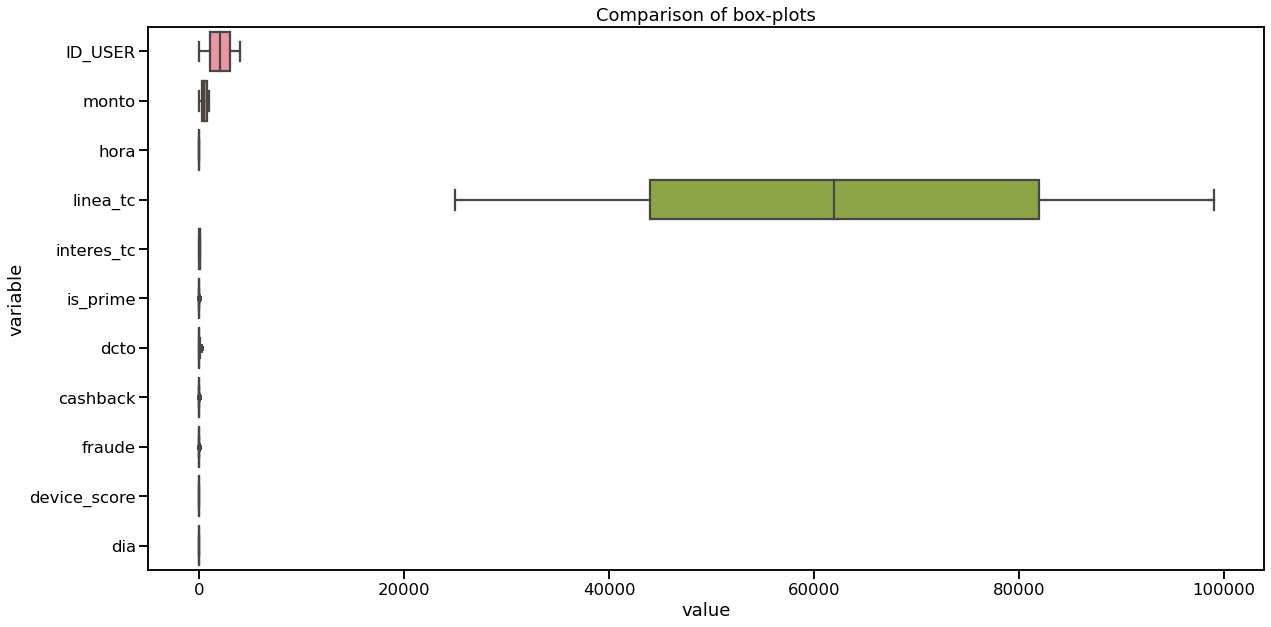

In [18]:
plt.figure(figsize=(20, 10))
sns.set_context('talk')
_ = sns.boxplot(y="variable", x="value", data=pd.melt(data[numericas])).set_title('Comparison of box-plots')

In order to have a better comparison of the graph, the variables: `linea_tc`,` ID_USER` and `amount` will be removed from the illustration. <br>
We can see that the other variables have a similar range, with the exception of `is_prime` and` fraud`, which are our Boolean variables. <r>
It is interesting to note that we have several possible outliers (points outside the interquartile range) in `dcto` and` cashback`. This may be because very few people have high levels of `dcto` and` cashback`.

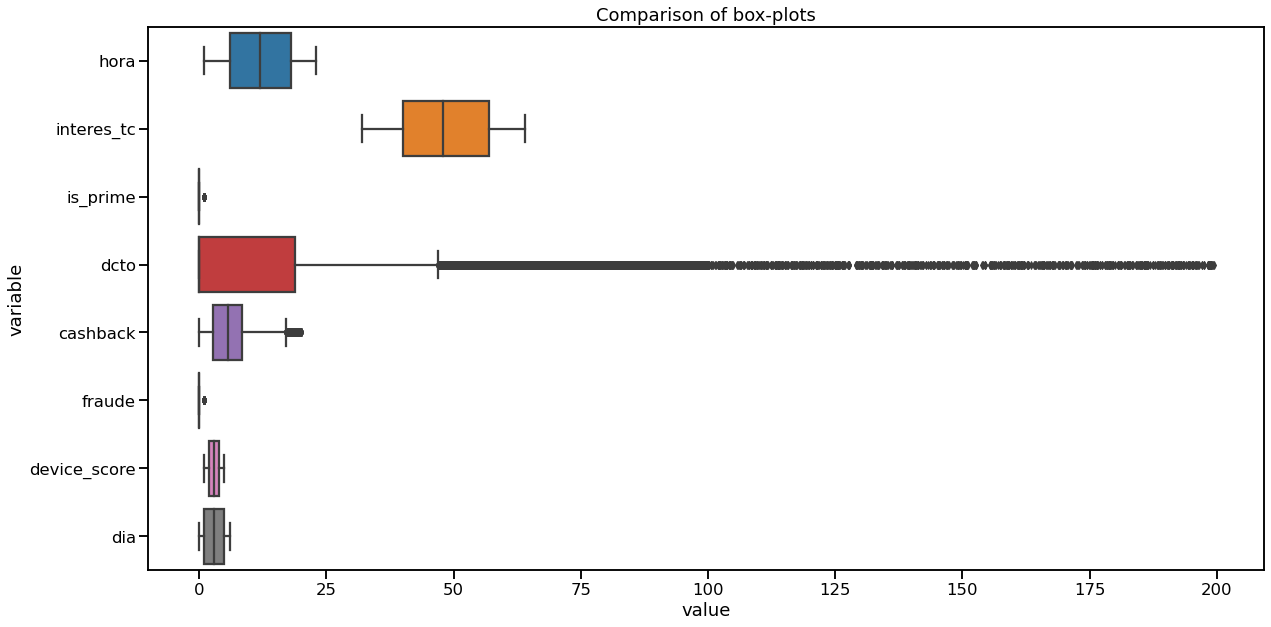

In [19]:
plt.figure(figsize=(20, 10))
sns.set_context('talk')
_ = sns.boxplot(y="variable", 
                x="value",
                data=pd.melt(data[numericas].drop(['ID_USER','linea_tc', 'monto'],
                                                  axis = 1))).set_title('Comparison of box-plots')

Looking at our correlation matrix, we can see that we have practically no linear relationships. This can highly affect linear models.
The only relevant linear relationship is  `amount` with` cashback` and `discount`. Which is logical, because higher amount produce higher `cashback` and `discount`.

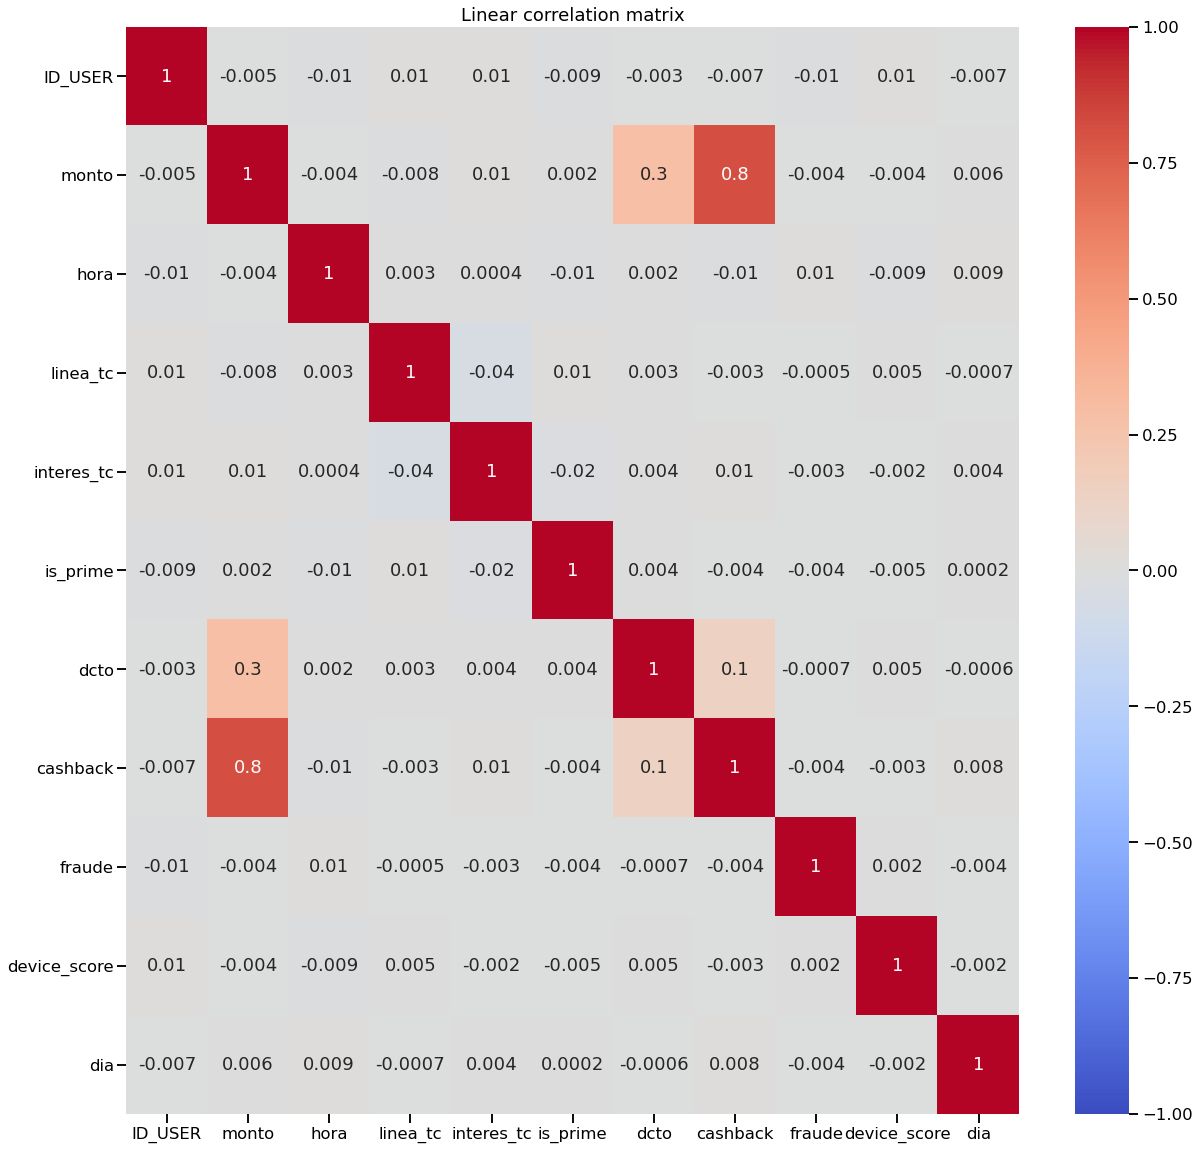

In [20]:
plt.figure(figsize=(20, 20))
_ =sns.heatmap(data[numericas].corr(),  annot = True, 
               fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm').set_title('Linear correlation matrix')


We can see that the linear correlations of our target variable `fraud` are practically **zero**.

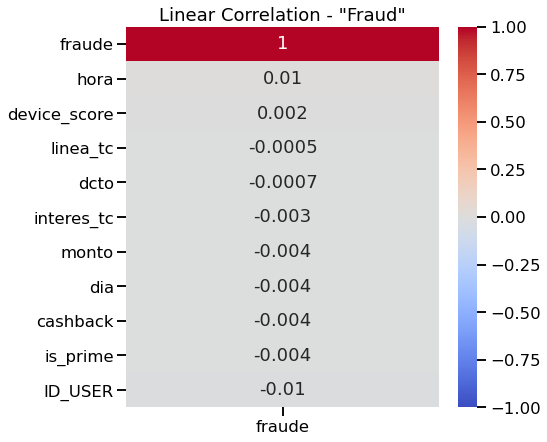

In [21]:
plt.figure(figsize=(7, 7))
_ = sns.heatmap(pd.DataFrame(data[numericas].corr()['fraude']).sort_values('fraude', ascending = False),
            annot = True, fmt='.1g', vmin=-1,
            vmax=1, center= 0, cmap= 'coolwarm').set_title('Linear Correlation - "Fraud"')

### Analyzing the variable `fraud`

We can easily realize that we are facing an unbalanced problem. Where the majority class has **97%** of the data. <br>
Special care must be taken in this, because our model could learn to predict the majority class. Therefore, it will be necessary to have a **data augmentation** step and use strong metrics for this type of bias (avoiding accuracy).

We have: 
Non-fraudulent transactions:	  26165
Fraudulent transactions:	  810 

In proportion, we have: 
Percentage of Non-fraudulent transactions:	  97.0%
Percentage of transactions fraudulent:	  3.0%


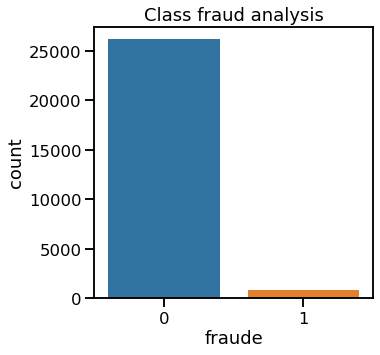

In [22]:
print('We have: ')

print('Non-fraudulent transactions:\t ', data['fraude'].value_counts()[0])
print('Fraudulent transactions:\t ', data['fraude'].value_counts()[1], '\n')

print('In proportion, we have: ')

no_fraude = data['fraude'].value_counts()[0]/len(data)*100
fraude = data['fraude'].value_counts()[1]/len(data)*100

print('Percentage of Non-fraudulent transactions:\t ', str(round(no_fraude, 2)) + '%')
print('Percentage of transactions fraudulent:\t ', str(round(fraude, 2)) + '%')
_ = plt.figure(figsize=(5, 5))
_ = sns.countplot(x="fraude", data = data).set_title('Class fraud analysis')

### Distribution analysis

In order to observe the distribution of our variables, the following code was implemented.

We can see that we have very diverse distributions, this is highly problematic, because linear models need normal distributions to work well. We can also observe discrete variables, such as:

- `is_prime`
- `hora`
- `is_prime`
- `fraude`
- `device_score`
- `dia` <br><br>

We can also observe the following points:
- Most customers do not have premium accounts
- Most transactions are not discounted
- Most `cashback` is below 10%
- The variable `amount` is uniformly distributed
- The day with the most transactions is Wednesday

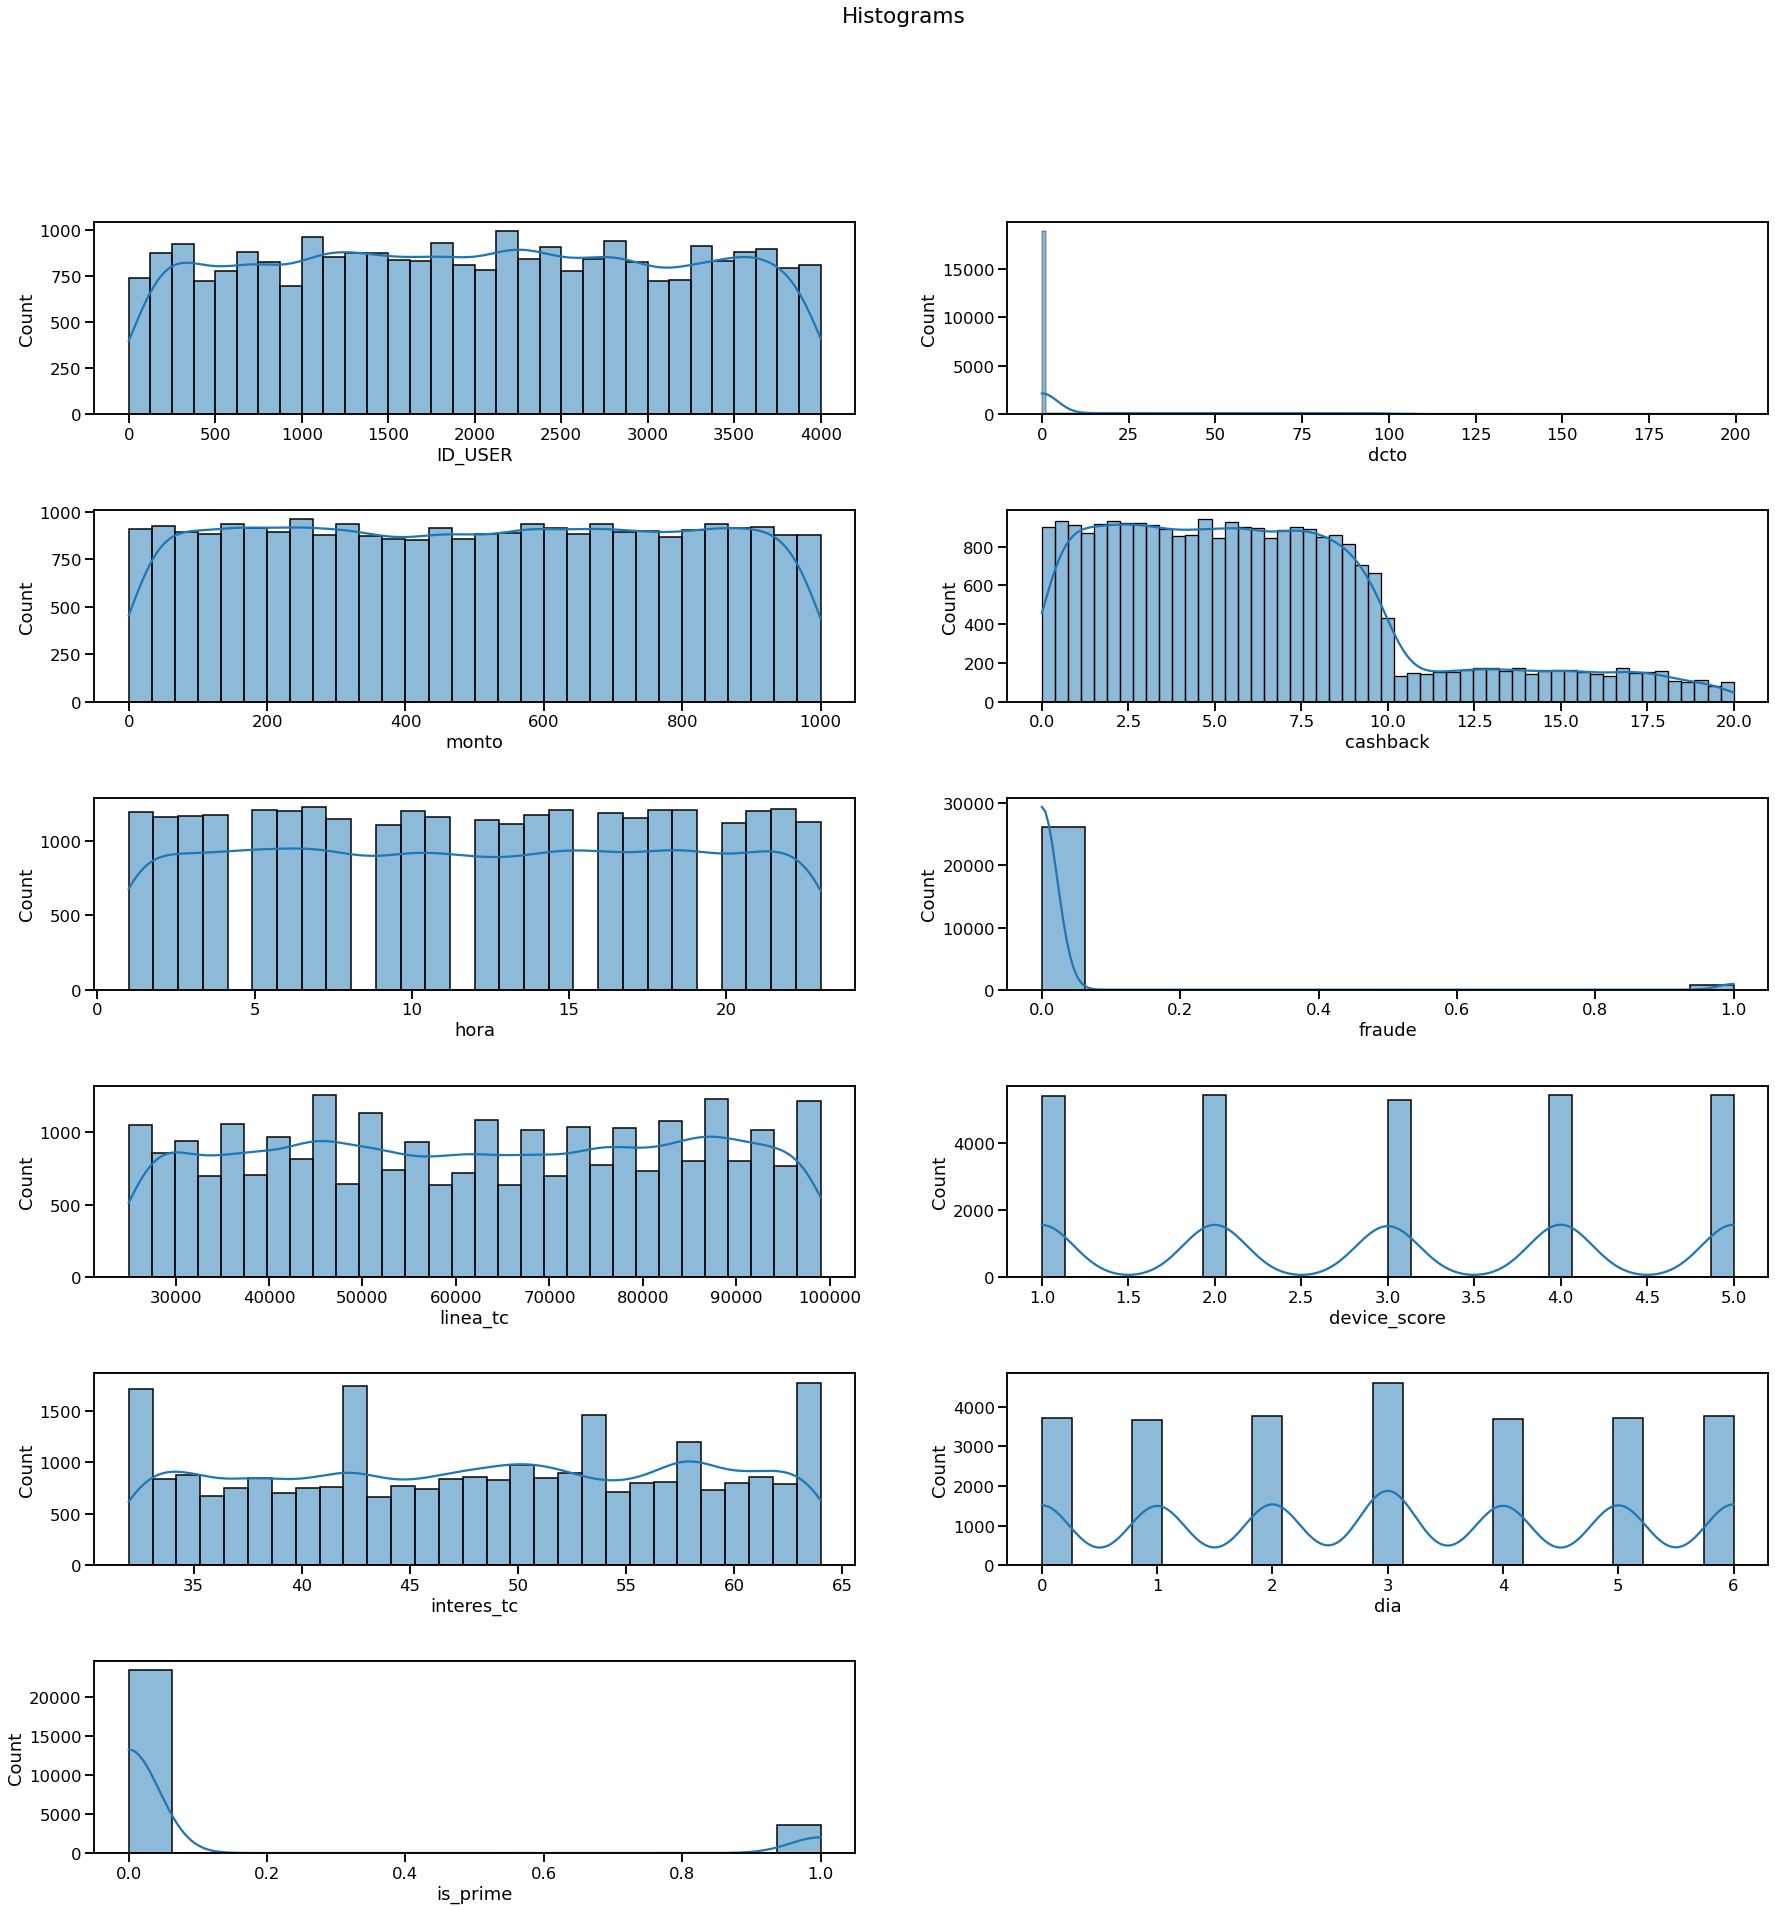

In [23]:
var_len = len(numericas )
n_col = 2
n_row = int(var_len/n_col) + 1

fig, axes = plt.subplots(n_row, n_col, sharex = False, sharey = False, figsize=(30,30))
#axes = axes.flatten() 
_ = fig.suptitle('Histograms')
plt.subplots_adjust(hspace = 0.5)


for i, name in enumerate(numericas):
    plt.title(name)
    sns.histplot(data[name], kde=True, ax=axes[int(i%n_row), int(i/n_row)])
    
axes[5,1].set_visible(False)
    

### Categorical variables analysis

By performing various barplots of the categorical variables, we can reach the following conclusions: <br>
- There are more transactions by men than women.
- There are transactions in process.
- The number of NAs in `city` and` establishment` is predominant.
- The variable `model` only has the value of 2000. So it is necessary to remove it, since there is no variability in this variable.
- Most of the transactions are by physical cards.

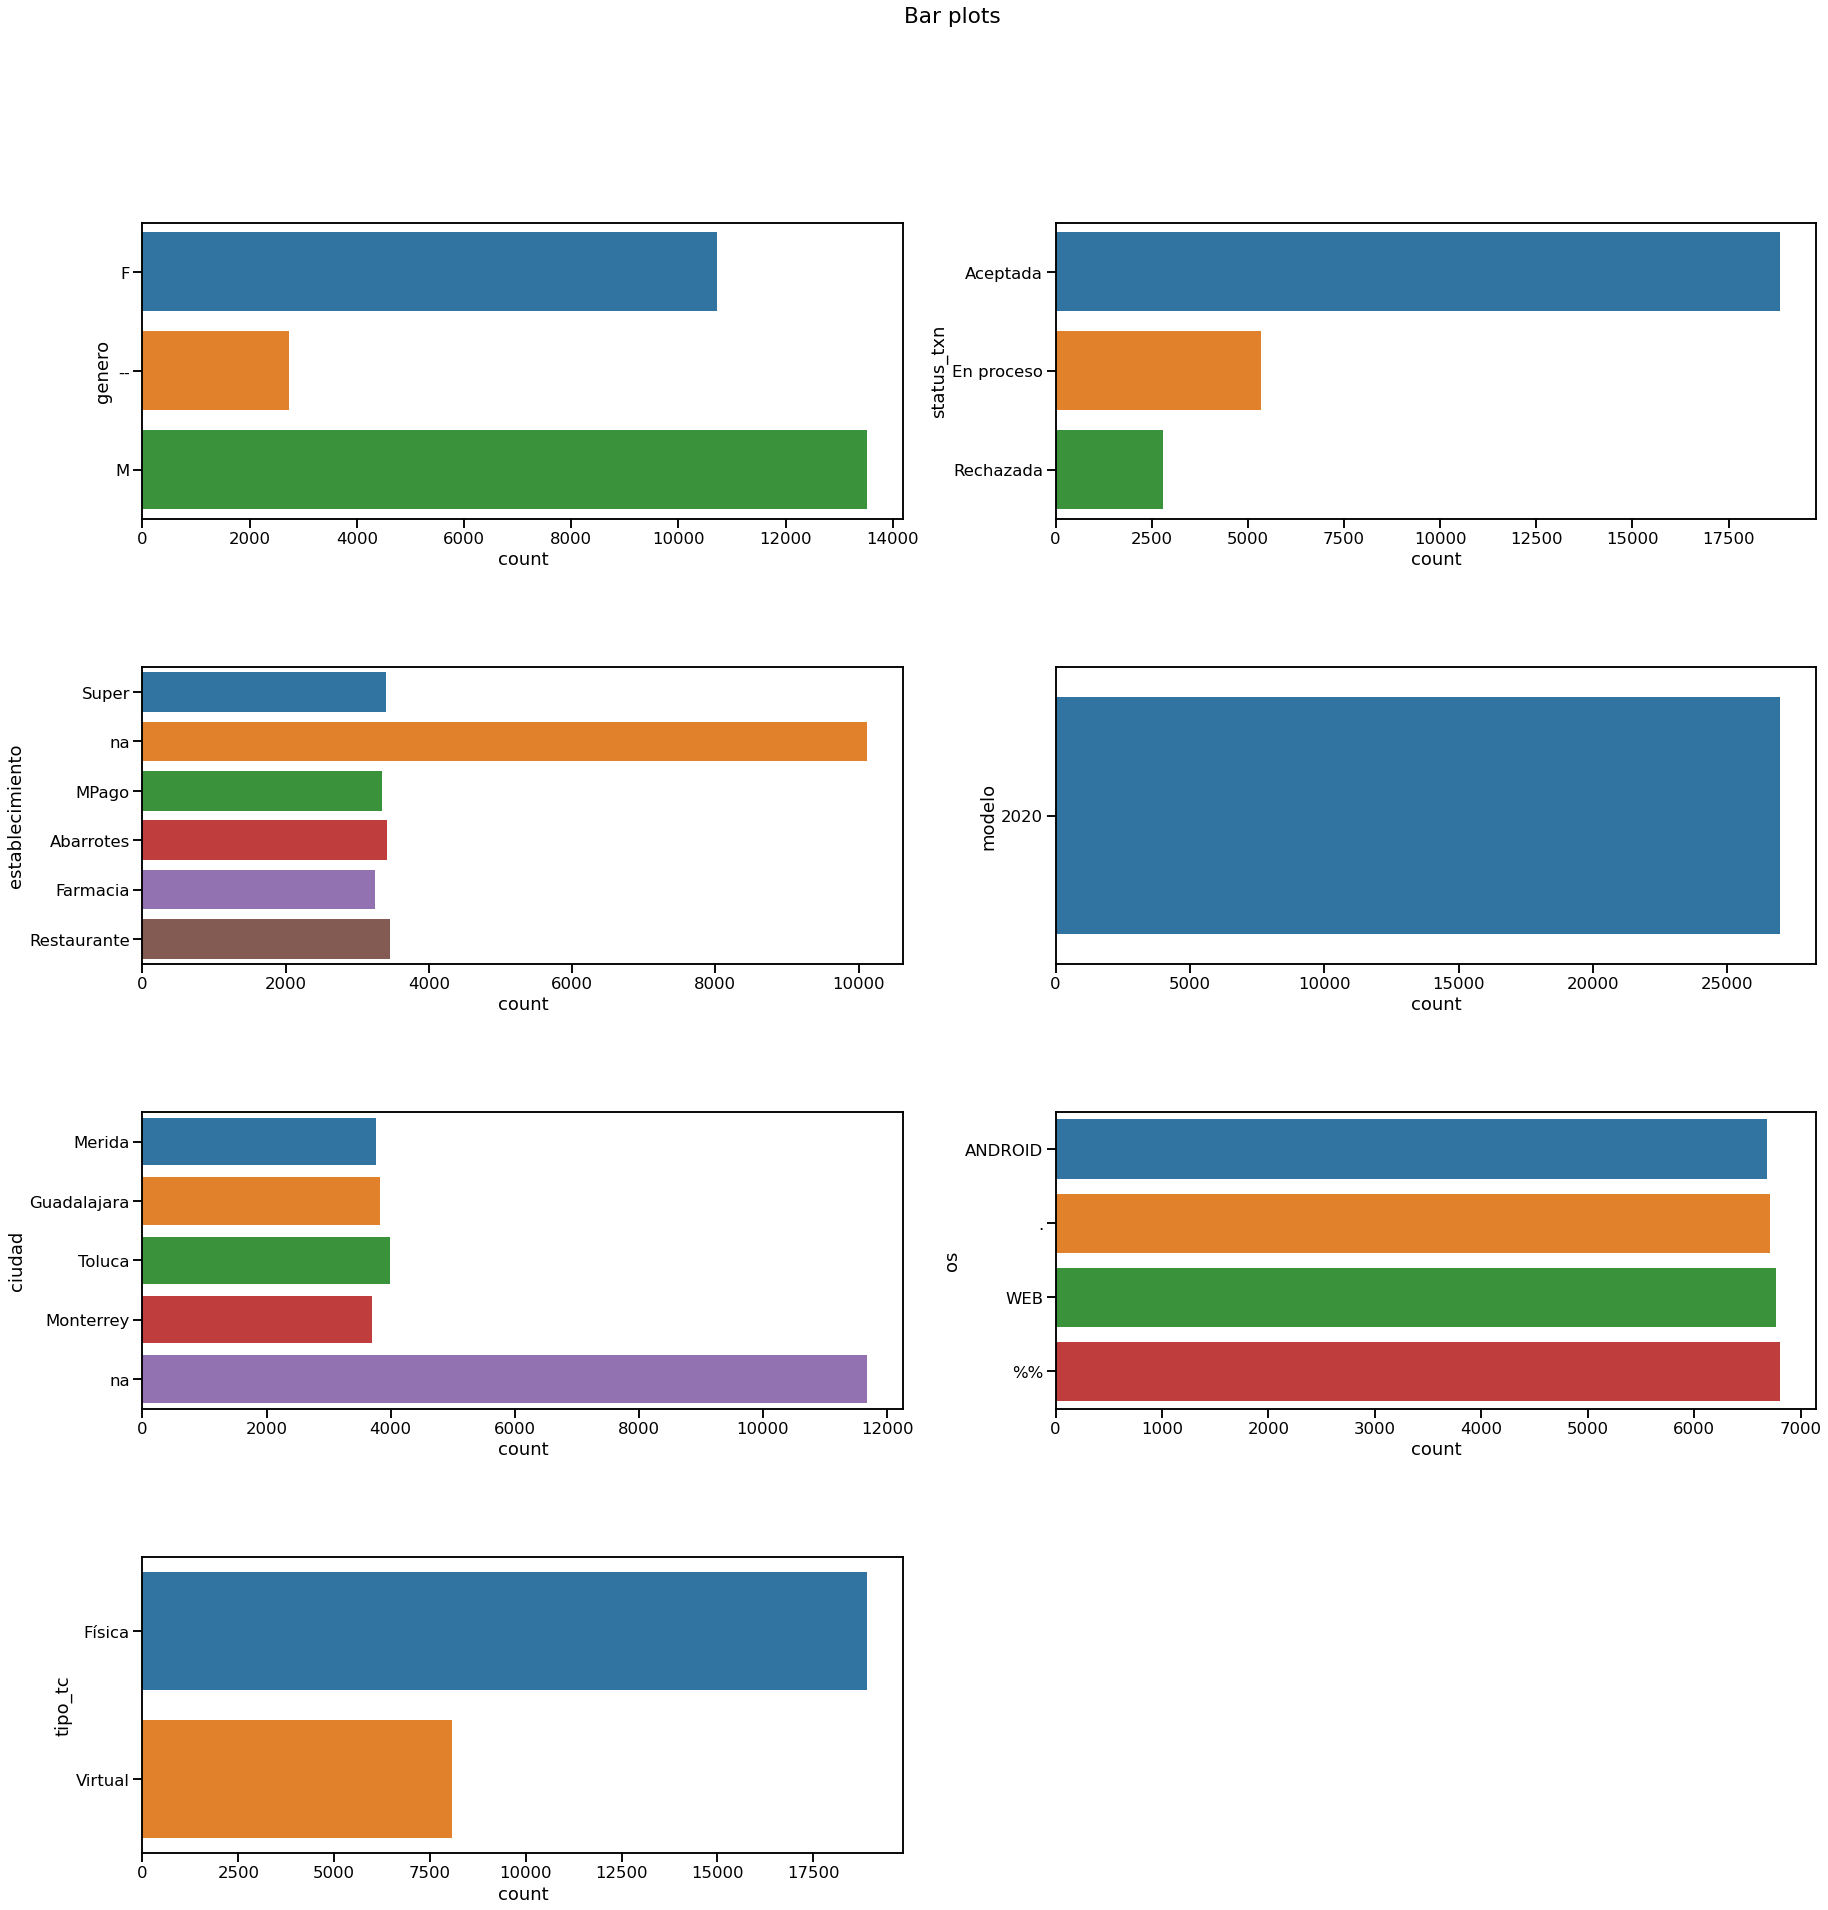

In [24]:
var_len = len(non_numerical)
n_row = int(var_len/2) + 1
n_col = 2

fig, axes = plt.subplots(n_row, n_col, sharex = False, sharey = False, figsize=(30,30))
#axes = axes.flatten() 
_ = fig.suptitle('Bar plots')
plt.subplots_adjust(hspace = 0.5)


for i, name in enumerate(non_numerical):
    plt.title(name)
    sns.countplot(y= name, data = data, ax=axes[int(i%n_row), int(i/n_row)])
    
axes[3,1].set_visible(False)

In [25]:
# Eliminating the model variable due to low data variability
data.drop('modelo', inplace = True, axis = 1)

#### Are there clients with more than one fraud?

We can see that there are clients who have even committed fraud **4 times**. This could help in analyzing whether incidence is an important factor.

In [26]:
fraudes = pd.DataFrame(data.groupby(['ID_USER']).sum()['fraude']).reset_index()
num_fraudes = pd.DataFrame(fraudes.value_counts('fraude').reset_index())
num_fraudes = num_fraudes.rename({'fraude': 'Number of frauds', 0:'Number of clients'}, axis = 1)
num_fraudes

,Number of frauds,Number of clients
0,0,3325
1,1,563
2,2,93
3,3,15
4,4,4


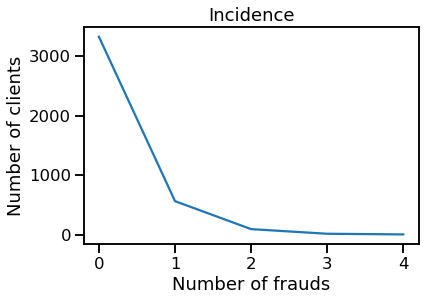

In [27]:
_ = sns.lineplot(data = num_fraudes,
             x = "Number of frauds", y = "Number of clients").set_title('Incidence')

## Segmenting customers
### Recency Frequency Monetary model

One of the most used models in customer segmentation is **Recency Frequency Monetary model**. In which customers are compared on these three main factors. <br>
- `Recency` refers to how recently a customer made a purchase (in this case transaction.
- `Frequency` indicates how often the client make a purchase (make a transaction).
- `Monetary value`, which indicates how much a customer spends money on purchases.

#### Preprocesing data for RFM model.

In [28]:
customers_df = data.copy()
customers_df['fecha'] = fechas
customers_df.head()

,ID_USER,genero,monto,hora,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,device_score,os,dia,fecha
0,0,F,608.345634,20,Super,Merida,Física,71000,51,Aceptada,0,60.834563,5.475111,0,3,ANDROID,1,2020-01-21
1,0,F,88.719243,7,na,Merida,Virtual,71000,51,Aceptada,0,0.000000,1.774385,0,1,ANDROID,2,2020-01-15
2,1,F,790.037653,11,na,Guadalajara,Virtual,94000,56,En proceso,0,0.000000,15.800753,0,1,.,4,2020-01-17
3,1,F,767.005387,11,MPago,Guadalajara,Física,94000,56,Aceptada,0,0.000000,7.670054,0,3,WEB,6,2020-01-05
4,1,F,254.171053,10,na,Guadalajara,Física,94000,56,Aceptada,0,0.000000,2.541711,0,3,%%,3,2020-01-30


Getting the latest date

In [29]:
ultima_fecha = customers_df['fecha'].max() 
ultima_fecha_plus_1 = ultima_fecha + timedelta(days = 1)
print('Latest date: {}\nLatest date plus one: {}'.format(ultima_fecha.date(),
                                                         ultima_fecha_plus_1.date()))

Latest date: 2020-01-30
Latest date plus one: 2020-01-31


In [30]:
#Columns used
columns_c = ['ID_USER', 'monto', 'fecha']

In [31]:
data_c = customers_df[columns_c].copy()
data_c.loc[:, 'c'] = 1
data_c.head()

,ID_USER,monto,fecha,c
0,0,608.345634,2020-01-21,1
1,0,88.719243,2020-01-15,1
2,1,790.037653,2020-01-17,1
3,1,767.005387,2020-01-05,1
4,1,254.171053,2020-01-30,1


In [32]:
#Get matrix for RFA - model
df_c = data_c.groupby('ID_USER').agg({'fecha': lambda x: (ultima_fecha_plus_1 - x.max()).days,
                             'c': 'count',
                             'monto': 'sum'}).rename({'fecha':'Recency', 
                                                      'c':'Frequency', 'monto': 'Amount'}, axis = 1)
df_c.head()

,Recency,Frequency,Amount
ID_USER,,,
0,10,2,697.064876
1,1,7,3416.796066
2,1,7,2789.893416
3,5,2,477.972148
4,4,1,277.176524


It is necessary to see the distribution of our variables, because the k-means algorithm is highly influenced by different ranges.

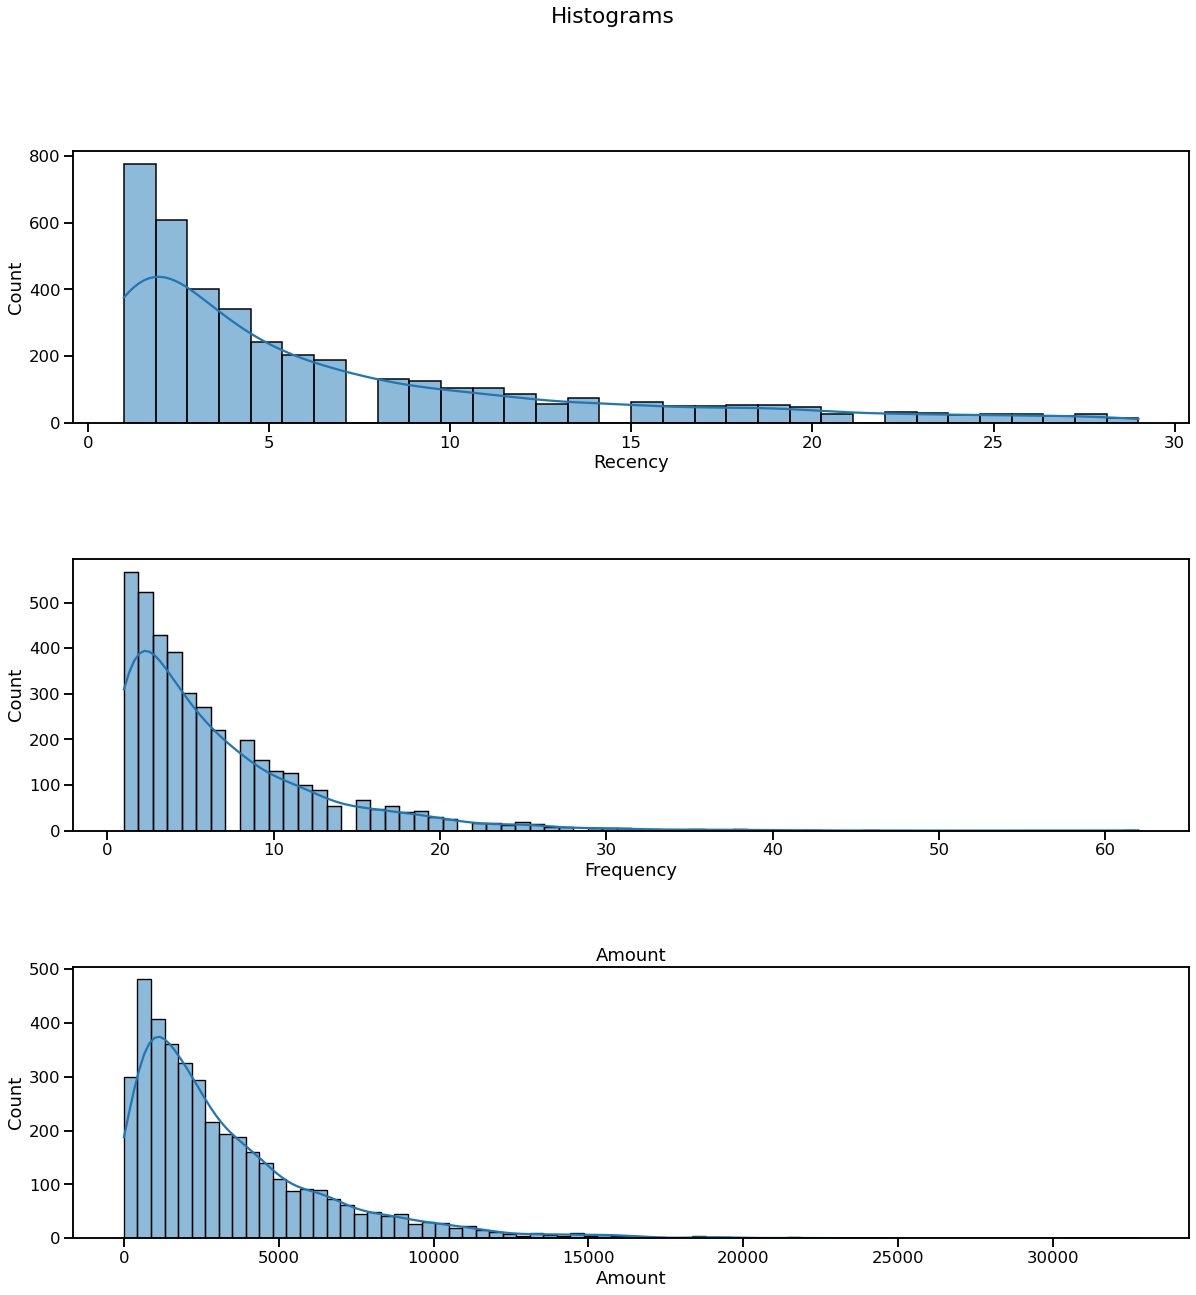

In [33]:
var_len = len(df_c.columns)
n_col = 1
n_row = int(var_len/n_col) 

fig, axes = plt.subplots(n_row, n_col, sharex = False, sharey = False, figsize=(20,20))

_ = fig.suptitle('Histograms')
plt.subplots_adjust(hspace = 0.5)


for i, name in enumerate(df_c.columns):
    plt.title(name)
    sns.histplot(df_c[name], kde=True, ax=axes[int(i%n_row)])

Since the ranges are quite different it is necessary to scale the data.

In [34]:
scaler = StandardScaler()
df_c_scaled = scaler.fit_transform(df_c)
df_c_scaled = pd.DataFrame(df_c_scaled, columns = df_c.columns)

Finding the number of clusters k using the elbow rule.

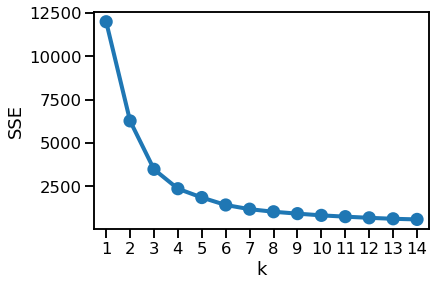

In [35]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_c_scaled)
    sse[k] = kmeans.inertia_ 
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

For reasons of explicability, **k = 3 was chosen**, in addition there is not much change in SSE from k = 3 to k = 4 compared from k = 2 to k = 3.

#### Fit the `k-means` with `k = 3`

In [36]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_c_scaled)

KMeans(n_clusters=3, random_state=42)

Get clusters.

In [37]:
df_c.loc[:,'Cluster'] = model.labels_
df_c.groupby('Cluster').mean()

,Recency,Frequency,Amount
Cluster,,,
0,4.156928,5.283389,2604.343382
1,2.209141,17.347645,8810.572127
2,17.344671,2.030612,976.371591


We can see that there are 3 well-defined clusters. The first `0`, tells us about a cluster with somewhat medium recency, a significant frequency (5 times in almost a month) and a fairly considerable amount. Given these characteristics, I will call these customers `When I buy, I buy well`.

The second cluster `1` tells us about some clients who buy with a very large quantity, with great frequency (approximately once every two days). For these reasons, I will call this cluster `the buyers`.

The third cluster `2` tells us about clients with very low frequency, very low recency and a low quantity. For all this, I will call this group of clients `the absentees`.

The following graphs show the behavior of these clients:

In [38]:
names = {0:'When I buy, I buy well', 1: 'The buyers', 2: 'The absentees'}
df_c.loc[:, 'Cluster'] = df_c['Cluster'].map(lambda x: names[x] )

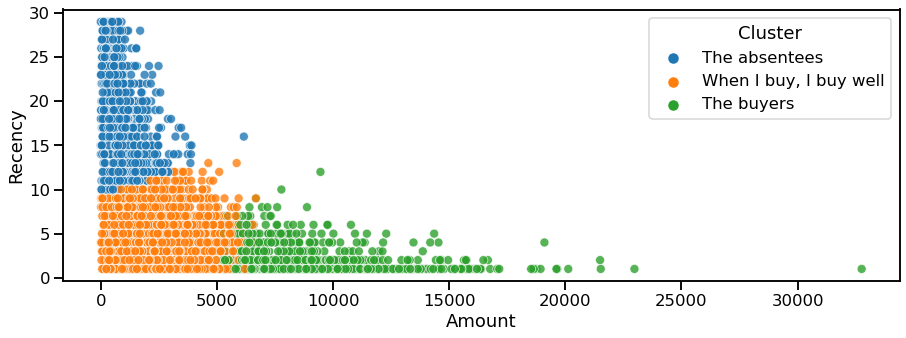

In [39]:
_ = plt.figure(figsize=(15, 5))
sns.scatterplot(data = df_c, x = "Amount", y = "Recency", hue = 'Cluster', alpha = 0.8)
plt.show()

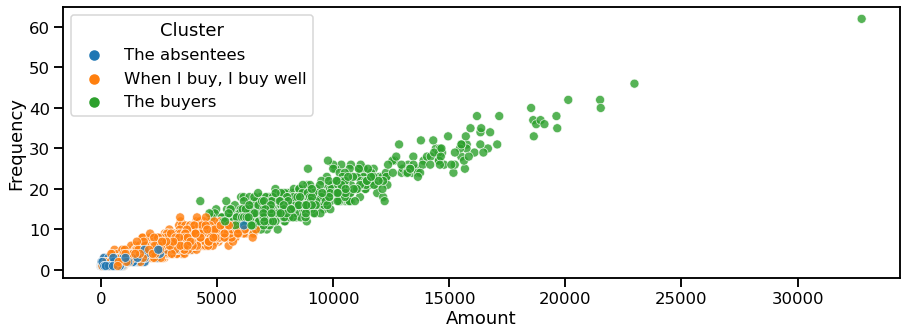

In [40]:
_ = plt.figure(figsize=(15, 5))
sns.scatterplot(data = df_c, x = "Amount", y = "Frequency", hue = 'Cluster', alpha = 0.8)
plt.show()

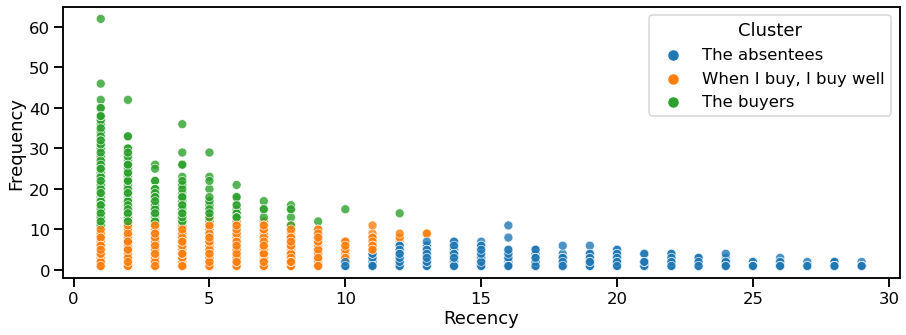

In [41]:
_ = plt.figure(figsize=(15, 5))
sns.scatterplot(data = df_c, x = "Recency", y = "Frequency", hue = 'Cluster', alpha = 0.8)
plt.show()

---

## Fraud detection model

In [42]:
# Eliminating transactions with status in process, in order to create a model.
data = data[data['status_txn'] != 'En proceso'].reset_index(drop = True)
data.head()

,ID_USER,genero,monto,hora,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,device_score,os,dia
0,0,F,608.345634,20,Super,Merida,Física,71000,51,Aceptada,0,60.834563,5.475111,0,3,ANDROID,1
1,0,F,88.719243,7,na,Merida,Virtual,71000,51,Aceptada,0,0.000000,1.774385,0,1,ANDROID,2
2,1,F,767.005387,11,MPago,Guadalajara,Física,94000,56,Aceptada,0,0.000000,7.670054,0,3,WEB,6
3,1,F,254.171053,10,na,Guadalajara,Física,94000,56,Aceptada,0,0.000000,2.541711,0,3,%%,3
4,1,F,37.003747,3,na,Guadalajara,Física,94000,56,Rechazada,0,0.000000,0.370037,0,2,%%,0


### Split de datos

To be able to model, it is necessary to convert our discrete variables to dummies, the process that was chosen to follow is **one hot encoding**.

In [43]:
df = pd.get_dummies(data)

In [44]:
df.drop('ID_USER', inplace = True, axis  = 1)

In order to avoid bias, the dataset was divided into **80% in train** and **20% in training**.

In [45]:
X = df.drop(['fraude'], axis = 1)
y = df['fraude'] 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size = 0.2, 
                                                    random_state = 42)

Since we are solving a banking problem, it is necessary to follow the explanatory standards of the models. <br>
In this particular case, the **logistic regression will be used** as the base model. Since it is one of the simplest models to use. <br>
In future work, more complex models can be used to improve the model's metrics.

In [46]:
y_train_1 = 100*y_train.value_counts()[1]/(len(y_train))
y_test_1 = 100*y_test.value_counts()[1]/(len(y_test))
print('We have ' +  str(round(y_train_1, 2)) + '%' + ' of fraudulent transactions in train.')
print('We have ' +  str(round(y_test_1, 2)) + '%' + ' of fraudulent transactions in test.')

We have 2.99% of fraudulent transactions in train.
We have 3.03% of fraudulent transactions in test.


Since we are going to train a linear model, it is necessary to **scale the data**, in order to our model will  benot biased by the unequal ranges of the variables.

In [47]:
robust_scaler = RobustScaler()

In [48]:
X_scaled = robust_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

To **deploy** our model, our scaler was saved in joblib format.

In [49]:
dump(robust_scaler, 'scaler.joblib')

['scaler.joblib']

Next, we will define a logistic regression and all the **hyperparameters** that we will look for in our **cross validation**.

In [50]:
log_regresion = LogisticRegression(n_jobs = -1, random_state = 1, solver = 'lbfgs',
                                   max_iter = 1000, verbose = 0)

parametros = {'penalty': ['l2'], 'C': [1, 0.1]}

grid_search = GridSearchCV(log_regresion, parametros)

Subsequently, a **stratified k fold cross-validation** with `k = 5` will be executed with **data augmentation**, in order to balance or data.

In [51]:
#Best_models
modelos = []

#Metrics
AUC = []
precision = []
acurracy = []
recall = []

In [52]:
split_stratified = StratifiedKFold(n_splits = 5, random_state = None, shuffle=False)

In [53]:
%%time
for train_s, test_s in split_stratified.split(X_train, y_train):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), grid_search)
    
    pipeline.fit(X_train.iloc[train_s], y_train.iloc[train_s])
    best_model = pipeline['gridsearchcv'].best_estimator_
    modelos.append(best_model)
    
    predicciones = best_model.predict(X_train.iloc[test_s])
    
    AUC.append(roc_auc_score(y_train.iloc[test_s], predicciones))
     
    precision.append(precision_score(y_train.iloc[test_s], predicciones))
    
    acurracy.append(accuracy_score(y_train.iloc[test_s], predicciones))
    
    recall.append(recall_score(y_train.iloc[test_s], predicciones))

C:\Users\hp_azul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Wall time: 13min 50s


Because we are working on an unbalanced classification problem, the metrics that interest us most are `precision` and `recall`. <br>

- `Precision` helps us to know the proportion of fraudulent people that I detected with respect to the total.

- `Recall` helps us to know how well our model identifies the true fraudulent.


In [54]:
metrics = pd.DataFrame({'K': list(range(0, 5)), 'AUC': AUC, 'Precision':
                        precision, 'Acurracy': acurracy, 'Recall': recall})
metrics

,K,AUC,Precision,Acurracy,Recall
0,0,0.506171,0.040000,0.936742,0.048077
1,1,0.529499,0.035000,0.647603,0.403846
2,2,0.500000,0.000000,0.970240,0.000000
3,3,0.479663,0.020501,0.848599,0.087379
4,4,0.495653,0.023077,0.934412,0.029126


In this particular case, we see that the model with the most precision and recall is the model with `k = 1`.

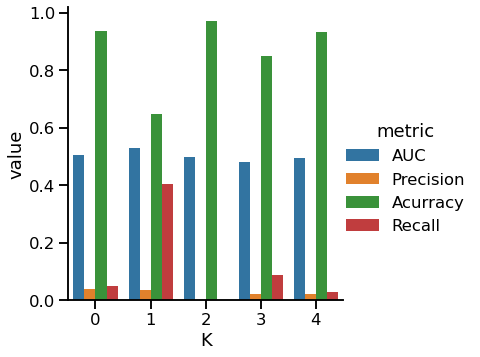

In [55]:
metrics_long = pd.melt(metrics, id_vars=['K']).rename({'variable': 'metric'}, axis = 1)
_ = sns.catplot(x = "K", y= "value", kind="bar", hue="metric", data = metrics_long)


In [64]:
best_model = modelos[1]

Our parameters.

In [65]:
best_model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

We save our model for deploy

In [66]:
dump(best_model, 'logistic_regressor.joblib')

['logistic_regressor.joblib']

### Testing

Next, we are going to use the `evaluate` function. Which makes us a descriptive analysis of our dataset of test.

In [67]:
def evaluate(model, x, y, pred_vector = False, normalize_m = None):
    
    if pred_vector:
        y_predict = x
    else:
        y_predict = model.predict(x)
    print(classification_report(y, y_predict))
    plt.rcParams.update({'font.size': 14})
    cm = confusion_matrix(y, y_predict)
    skplt.metrics.plot_confusion_matrix(y, y_predict,  figsize=(12,12), normalize = normalize_m)

Scaling and predicting the X_test.

In [68]:
X_test_scaled = robust_scaler.transform(X_test)
predicciones = best_model.predict(X_test_scaled)

We can observe that of the 131 fraudulent transactions, we have been able to detect approximately 37% (recall). It is also necessary to see that we have a fairly low precision. Which would imply more expenses in terms of actions to detect fraud (phone calls, angry customers due to card suspension, etc ...)

              precision    recall  f1-score   support

           0       0.97      0.57      0.72      4196
           1       0.03      0.37      0.05       131

    accuracy                           0.56      4327
   macro avg       0.50      0.47      0.38      4327
weighted avg       0.94      0.56      0.70      4327



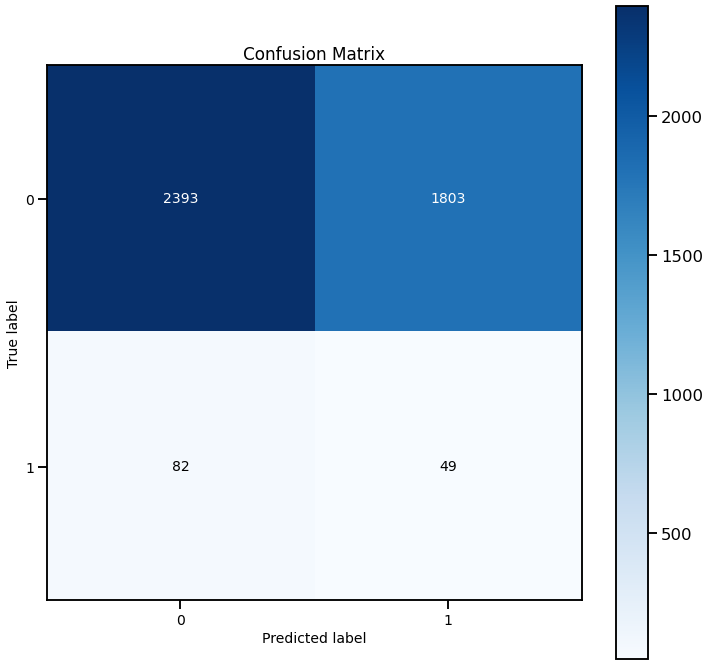

In [69]:
evaluate(best_model, predicciones, y_test, pred_vector = True, normalize_m = None)

The `get_importance` function gives us the importance of the coefficients. 

We can see that the most important variable is `amount` (negatively). This could reflect that fraudulent transactions have to be small to go unnoticed. It is also important to note that we have very small coefficients

In [70]:
def get_importance(model, columns):
    plt.figure(figsize=(15, 10))
    coeff = list(model.coef_[0])
    df = pd.DataFrame({'Variables': columns, 'Coefficients': coeff})
    df = df.sort_values('Coefficients', ascending = True)
    sns.barplot(y = 'Variables', x = 'Coefficients', data = df)

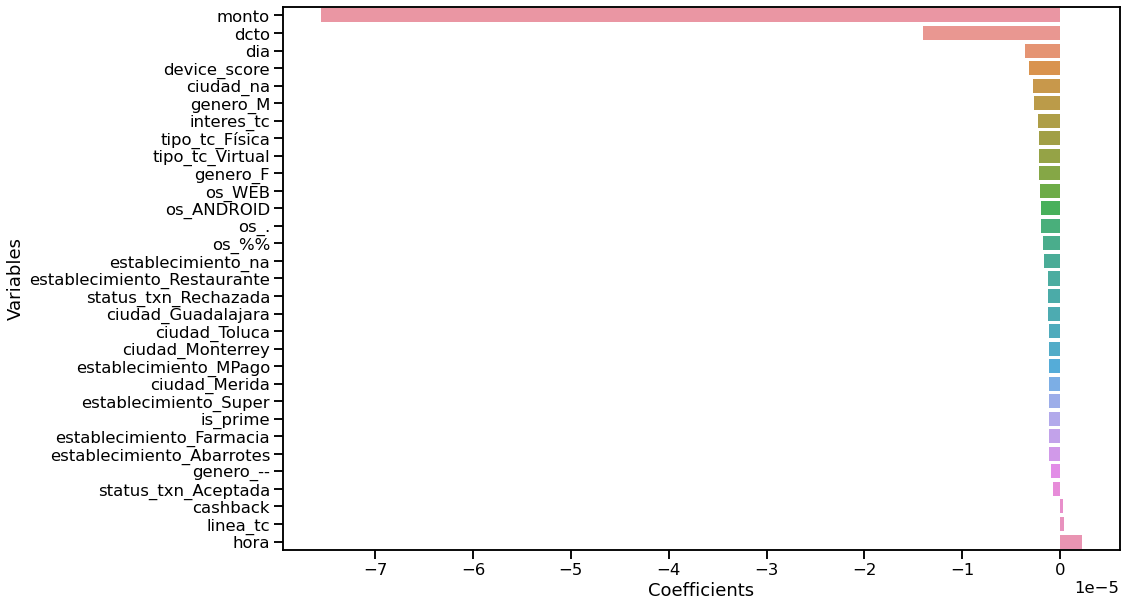

In [71]:
get_importance(best_model, X_test.columns)

## Conclusions


Creating a model for fraud detection is a difficult task. Because they are generally unbalanced problems with many variables. In addition to regulatory issues, it is necessary to use white box models to give explicability in the models. <br> <br>

In this particular problem, a recall score of **37%** was achieved in test.

In order to improve the model, the following future work is proposed:
- Feature enginnering
- try more models: Isolation Forest, Random Forest, etc...

:) 